# Import niezbędnych bibliotek.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Wczytanie danych.

In [2]:
df = pd.read_csv('df1.csv')
df_2 = pd.read_csv('df2.csv')
df_3 = pd.read_csv('attrition.csv')
df_4 = pd.read_csv('sample_output.csv')

# Połączenie plików w jeden główny.
Sprawdzamy liczbę kolumn i wierszy.

In [3]:
print(df.shape)
print(df_2.shape)
print(df_3.shape)
print(df_4.shape)

(4449, 20)
(4449, 17)
(4449, 2)
(147, 2)


In [4]:
df.head(2)

,EmployeeNumber,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked
0,104,30.0,Travel_Rarely,852.0,Research & Development,1.0,1.0,Life Sciences,1.0,4.0,Male,55.0,2.0,2.0,Laboratory Technician,4.0,Married,5126.0,15998.0,1.0
1,1638,38.0,Travel_Rarely,397.0,Research & Development,2.0,2.0,Medical,1.0,4.0,Female,54.0,2.0,3.0,Manufacturing Director,3.0,Married,7756.0,14199.0,3.0


In [5]:
df_2.head(2)

,EmployeeNumber,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,YearlyIncome
0,104,Y,Yes,12.0,3.0,3.0,80.0,2.0,10.0,1.0,2.0,10.0,8.0,3.0,0.0,No,61512.0
1,1638,Y,Yes,19.0,3.0,4.0,80.0,1.0,10.0,6.0,4.0,5.0,4.0,0.0,2.0,No,93072.0


In [6]:
df_3.head(2)

,EmployeeNumber,Attrition
0,104,No
1,1638,No


Czwarty dataset dotyczcy pracowników o innych indeksach, zatem nie bierzemy go pod uwagę.

In [7]:
df_4.head(2)

,EmployeeNumber,Attrition
0,100000,1
1,100001,1


Mergujemy dane komendą join, dołączając poszczególne pliki do pierwszego df.

In [8]:
df = df.join(df_2, lsuffix='_caller', rsuffix='_other')
df = df.join(df_3, lsuffix='_caller', rsuffix='_other')

Sprawdzamy, czy zgadza się liczba kolumn w pliku.

In [9]:
df.shape

(4449, 39)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 39 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   EmployeeNumber_caller     4449 non-null   int64  
 1   Age                       4449 non-null   float64
 2   BusinessTravel            4449 non-null   object 
 3   DailyRate                 4449 non-null   float64
 4   Department                4449 non-null   object 
 5   DistanceFromHome          4449 non-null   float64
 6   Education                 4449 non-null   float64
 7   EducationField            4449 non-null   object 
 8   EmployeeCount             4449 non-null   float64
 9   EnvironmentSatisfaction   4449 non-null   float64
 10  Gender                    4449 non-null   object 
 11  HourlyRate                4449 non-null   float64
 12  JobInvolvement            4449 non-null   float64
 13  JobLevel                  4449 non-null   float64
 14  JobRole 

# Sprawdzenie danych.

## Sprawdzenie, czy dane się nie duplikują.

In [11]:
df.columns

Index(['EmployeeNumber_caller', 'Age', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'EmployeeCount', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'EmployeeNumber_other', 'Over18', 'OverTime', 'PercentSalaryHike',
       'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager', 'Attrition_caller',
       'YearlyIncome', 'EmployeeNumber', 'Attrition_other'],
      dtype='object')

Komendą T.drop_duplicates().T usuwamy zdublikowane kolumny.

In [12]:
df = df.T.drop_duplicates().T

In [13]:
df.shape

(4449, 36)

In [14]:
df.duplicated(keep=False).sum()

0

Usuneliśmy trzy zdublikowane komulny, następnie komendą duplicated(keep=False).sum() sprawdzimiśmy, czy napewno wszystkie powtarzające dane zostały usunięte.

## Sprawdzamy braki w danych.

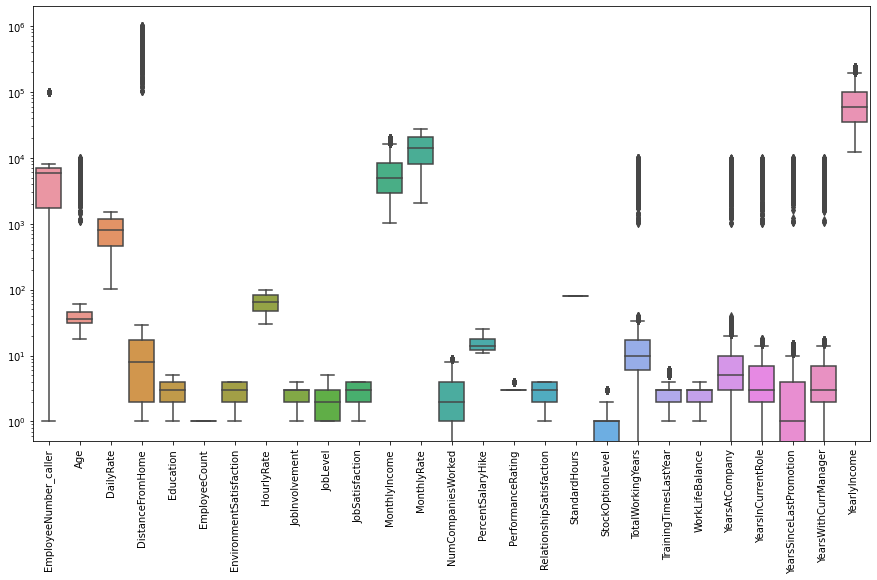

In [15]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df)

plt.yscale('log')
plt.xticks(rotation=90)
plt.show()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4449 entries, 0 to 4448
Data columns (total 36 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   EmployeeNumber_caller     4449 non-null   object
 1   Age                       4449 non-null   object
 2   BusinessTravel            4449 non-null   object
 3   DailyRate                 4449 non-null   object
 4   Department                4449 non-null   object
 5   DistanceFromHome          4449 non-null   object
 6   Education                 4449 non-null   object
 7   EducationField            4449 non-null   object
 8   EmployeeCount             4449 non-null   object
 9   EnvironmentSatisfaction   4449 non-null   object
 10  Gender                    4449 non-null   object
 11  HourlyRate                4449 non-null   object
 12  JobInvolvement            4449 non-null   object
 13  JobLevel                  4449 non-null   object
 14  JobRole                 

In [17]:
df.isnull().sum()

EmployeeNumber_caller         0
Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome                 0
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [18]:
df['Attrition_caller'].unique()

array(['No', 'Yes', nan], dtype=object)

In [19]:
df['EmployeeNumber_caller'].unique()

array([104, 1638, 164, ..., 7977, 7978, 7979], dtype=object)

In [20]:
df['Age'].unique()

array([30.0, 38.0, 26.0, 28.0, 35.0, 34.0, 32.0, 42.0, 40.0, 48.0, 39.0,
       18.0, 43.0, 21.0, 53.0, 45.0, 29.0, 33.0, 41.0, 24.0, 37.0, 50.0,
       36.0, 52.0, 47.0, 31.0, 49.0, 54.0, 44.0, 22.0, 46.0, 27.0, 55.0,
       59.0, 25.0, 23.0, 56.0, 20.0, 60.0, 51.0, 58.0, 19.0, 57.0, 8825.0,
       3628.0, 6287.0, 9330.0, 1107.0, 4454.0, 9155.0, 9890.0, 1189.0,
       9195.0, 9014.0, 1136.0, 5582.0, 2404.0, 1541.0, 4510.0, 4322.0,
       4988.0, 8388.0, 2530.0, 8901.0, 2852.0, 2459.0, 2982.0, 4973.0,
       8534.0, 8314.0, 4130.0, 4328.0, 7952.0, 8699.0, 3147.0, 8889.0,
       3871.0, 9531.0, 8167.0, 5257.0, 8136.0, 7390.0, 2993.0, 5672.0,
       5933.0, 5614.0, 5007.0, 3095.0, 9219.0, 6749.0, 4515.0, 6715.0,
       1141.0, 8949.0, 3636.0, 4805.0, 5959.0, 9384.0, 8042.0, 1423.0,
       7056.0, 5116.0, 2667.0, 8703.0, 1126.0, 9612.0, 7845.0, 6998.0,
       1788.0, 6727.0, 5377.0, 5565.0, 4558.0, 6506.0, 4591.0, 7662.0,
       6510.0, 4985.0, 9581.0, 2095.0, 2275.0, 6399.0, 4935.0, 2698

In [21]:
df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [22]:
df['DailyRate'].unique()

array([852.0, 397.0, 841.0, 1117.0, 464.0, 1107.0, 1018.0, 269.0, 296.0,
       989.0, 855.0, 1181.0, 895.0, 827.0, 977.0, 544.0, 244.0, 995.0,
       1343.0, 1282.0, 153.0, 280.0, 404.0, 1265.0, 252.0, 1496.0, 306.0,
       128.0, 529.0, 553.0, 572.0, 482.0, 471.0, 509.0, 130.0, 506.0,
       329.0, 367.0, 1219.0, 746.0, 1322.0, 969.0, 1271.0, 1158.0, 688.0,
       319.0, 371.0, 1336.0, 107.0, 448.0, 359.0, 625.0, 1017.0, 835.0,
       1050.0, 523.0, 1064.0, 1128.0, 928.0, 1319.0, 932.0, 809.0, 1376.0,
       253.0, 336.0, 884.0, 1385.0, 945.0, 118.0, 1231.0, 426.0, 737.0,
       1442.0, 853.0, 557.0, 377.0, 616.0, 1398.0, 1138.0, 531.0, 138.0,
       1377.0, 1240.0, 1400.0, 1001.0, 1082.0, 1171.0, 136.0, 218.0,
       452.0, 1397.0, 1192.0, 944.0, 408.0, 1040.0, 1329.0, 1416.0,
       1125.0, 1144.0, 442.0, 1157.0, 438.0, 147.0, 140.0, 240.0, 202.0,
       1297.0, 486.0, 1146.0, 150.0, 1404.0, 1206.0, 1172.0, 771.0,
       1167.0, 441.0, 1141.0, 715.0, 891.0, 282.0, 1425.0, 1371.0, 1

In [23]:
df['Department'].unique()

array(['Research & Development', 'Human Resources', 'Sales'], dtype=object)

In [24]:
df['DistanceFromHome'].unique()

array([1.0, 2.0, 6.0, 8.0, 4.0, 9.0, 3.0, 5.0, 22.0, 26.0, 10.0, 12.0,
       7.0, 25.0, 29.0, 18.0, 24.0, 28.0, 16.0, 19.0, 13.0, 20.0, 11.0,
       23.0, 21.0, 15.0, 14.0, 17.0, 27.0, 302984.0, 629986.0, 887003.0,
       918326.0, 997422.0, 852749.0, 679106.0, 304698.0, 772706.0,
       259089.0, 992947.0, 253620.0, 886117.0, 860358.0, 547308.0,
       193929.0, 963929.0, 809361.0, 140916.0, 825100.0, 418093.0,
       716417.0, 546730.0, 242839.0, 743173.0, 150886.0, 946786.0,
       607220.0, 560047.0, 840183.0, 588585.0, 479723.0, 302239.0,
       999590.0, 135607.0, 327380.0, 516738.0, 380120.0, 289540.0,
       470836.0, 636415.0, 147920.0, 649517.0, 688939.0, 549089.0,
       933385.0, 447546.0, 782402.0, 825855.0, 410963.0, 143454.0,
       667984.0, 815600.0, 332529.0, 535366.0, 692089.0, 367120.0,
       266645.0, 249717.0, 167566.0, 138023.0, 553235.0, 123628.0,
       102637.0, 381469.0, 264889.0, 376075.0, 274206.0, 647087.0,
       229109.0, 765855.0, 975446.0, 924937.0, 

In [25]:
df['Education'].unique()

array([1.0, 2.0, 3.0, 4.0, 5.0], dtype=object)

In [26]:
df['EducationField'].unique()

array(['Life Sciences', 'Medical', 'Other', 'Technical Degree',
       'Marketing', 'Human Resources'], dtype=object)

In [27]:
df['EmployeeCount'].unique()

array([1.0], dtype=object)

In [28]:
df['EnvironmentSatisfaction'].unique()

array([4.0, 3.0, 1.0, 2.0], dtype=object)

In [29]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [30]:
df['HourlyRate'].unique()

array([55.0, 54.0, 46.0, 66.0, 75.0, 52.0, 39.0, 56.0, 33.0, 82.0, 45.0,
       70.0, 97.0, 77.0, 40.0, 49.0, 58.0, 73.0, 43.0, 98.0, 95.0, 41.0,
       100.0, 84.0, 79.0, 74.0, 90.0, 96.0, 91.0, 32.0, 88.0, 86.0, 76.0,
       35.0, 94.0, 83.0, 65.0, 42.0, 31.0, 51.0, 36.0, 80.0, 69.0, 99.0,
       48.0, 89.0, 81.0, 61.0, 92.0, 59.0, 44.0, 47.0, 53.0, 34.0, 60.0,
       78.0, 30.0, 68.0, 37.0, 87.0, 50.0, 63.0, 72.0, 38.0, 71.0, 64.0,
       85.0, 57.0, 67.0, 62.0, 93.0], dtype=object)

In [31]:
df['JobInvolvement'].unique()

array([2.0, 3.0, 1.0, 4.0], dtype=object)

In [32]:
df['JobLevel'].unique()

array([2.0, 3.0, 1.0, 5.0, 4.0], dtype=object)

In [33]:
df['JobRole'].unique()

array(['Laboratory Technician', 'Manufacturing Director',
       'Research Scientist', 'Human Resources', 'Research Director',
       'Sales Representative', 'Manager', 'Healthcare Representative',
       'Sales Executive'], dtype=object)

In [34]:
df['JobSatisfaction'].unique()

array([4.0, 3.0, 2.0, 1.0], dtype=object)

In [35]:
df['MaritalStatus'].unique()

array(['Married', 'Single', 'Divorced'], dtype=object)

In [36]:
df['MonthlyIncome'].unique()

array([5126.0, 7756.0, 2368.0, ..., 13348.0, 7978.0, 3708.0], dtype=object)

In [37]:
df['MonthlyRate'].unique()

array([15998.0, 14199.0, 23300.0, ..., 14842.0, 14075.0, 2104.0],
      dtype=object)

In [38]:
df['NumCompaniesWorked'].unique()

array([1.0, 3.0, 0.0, 5.0, 9.0, 4.0, 2.0, 6.0, 7.0, 8.0], dtype=object)

In [39]:
df['Over18'].unique()

array(['Y'], dtype=object)

In [40]:
df['OverTime'].unique()

array(['Yes', 'No'], dtype=object)

In [41]:
df['PercentSalaryHike'].unique()

array([12.0, 19.0, 21.0, 15.0, 11.0, 16.0, 14.0, 13.0, 18.0, 23.0, 22.0,
       17.0, 20.0, 25.0, 24.0], dtype=object)

In [42]:
df['PerformanceRating'].unique()

array([3.0, 4.0], dtype=object)

In [43]:
df['RelationshipSatisfaction'].unique()

array([3.0, 4.0, 2.0, 1.0], dtype=object)

In [44]:
df['StandardHours'].unique()

array([80.0], dtype=object)

In [45]:
df['StockOptionLevel'].unique()

array([2.0, 1.0, 0.0, 3.0], dtype=object)

In [46]:
df['TotalWorkingYears'].unique()

array([10.0, 5.0, 1.0, 2.0, 3.0, 21.0, 11.0, 19.0, 0.0, 6.0, 26.0, 9.0,
       14.0, 17.0, 25.0, 12.0, 13.0, 7.0, 8.0, 18.0, 28.0, 15.0, 20.0,
       23.0, 24.0, 16.0, 37.0, 22.0, 4.0, 30.0, 32.0, 31.0, 27.0, 29.0,
       35.0, 38.0, 34.0, 40.0, 36.0, 33.0, 6618.0, 3808.0, 2764.0, 4370.0,
       1086.0, 5377.0, 8821.0, 9536.0, 1822.0, 4740.0, 3625.0, 8183.0,
       8890.0, 9670.0, 9815.0, 4506.0, 1442.0, 4031.0, 4196.0, 2450.0,
       6907.0, 8095.0, 4409.0, 5482.0, 9714.0, 8746.0, 7825.0, 6463.0,
       1123.0, 2194.0, 4607.0, 7635.0, 9501.0, 8270.0, 5787.0, 4958.0,
       3077.0, 8575.0, 2270.0, 4176.0, 1143.0, 5257.0, 6100.0, 8929.0,
       7173.0, 9311.0, 5407.0, 3201.0, 2230.0, 7349.0, 2651.0, 6666.0,
       2976.0, 4969.0, 1953.0, 6345.0, 8311.0, 6990.0, 6502.0, 8583.0,
       4640.0, 4132.0, 9939.0, 5789.0, 2027.0, 7864.0, 4795.0, 8062.0,
       6456.0, 9905.0, 9781.0, 6563.0, 9198.0, 3778.0, 5772.0, 9626.0,
       3360.0, 3089.0, 5629.0, 5742.0, 2730.0, 5463.0, 1337.0, 9495.0,


In [47]:
df['TrainingTimesLastYear'].unique()

array([1.0, 6.0, 3.0, 0.0, 4.0, 2.0, 5.0], dtype=object)

In [48]:
df['WorkLifeBalance'].unique()

array([2.0, 4.0, 3.0, 1.0], dtype=object)

In [49]:
df['YearsAtCompany'].unique()

array([10.0, 5.0, 1.0, 2.0, 7.0, 9.0, 20.0, 0.0, 3.0, 14.0, 8.0, 24.0,
       6.0, 4.0, 11.0, 15.0, 13.0, 21.0, 36.0, 26.0, 19.0, 16.0, 22.0,
       18.0, 25.0, 17.0, 12.0, 37.0, 33.0, 40.0, 34.0, 23.0, 29.0, 31.0,
       32.0, 27.0, 30.0, 5078.0, 7345.0, 3079.0, 2332.0, 1761.0, 1378.0,
       8870.0, 4879.0, 9445.0, 2265.0, 5801.0, 8553.0, 3761.0, 2051.0,
       7735.0, 2506.0, 9066.0, 3335.0, 1621.0, 8120.0, 3743.0, 9681.0,
       6797.0, 3707.0, 7547.0, 6133.0, 3177.0, 3549.0, 8717.0, 1036.0,
       9508.0, 1488.0, 5359.0, 2744.0, 5581.0, 9676.0, 1286.0, 5904.0,
       1872.0, 4763.0, 7324.0, 6140.0, 3687.0, 1420.0, 9767.0, 3507.0,
       6524.0, 5096.0, 6225.0, 7747.0, 5066.0, 9984.0, 5132.0, 5706.0,
       3231.0, 2659.0, 5506.0, 8867.0, 8875.0, 3912.0, 1625.0, 9577.0,
       3584.0, 9352.0, 5150.0, 6253.0, 1646.0, 8862.0, 2516.0, 3126.0,
       4604.0, 5276.0, 6040.0, 3074.0, 7335.0, 4706.0, 3645.0, 2987.0,
       3190.0, 3202.0, 1295.0, 5368.0, 1282.0, 2925.0, 2203.0, 2785.0,
  

In [50]:
df['YearsInCurrentRole'].unique()

array([8.0, 4.0, 3.0, 0.0, 2.0, 7.0, 6.0, 9.0, 5.0, 13.0, 11.0, 1.0, 10.0,
       17.0, 12.0, 15.0, 14.0, 16.0, 18.0, 3099.0, 3591.0, 6908.0, 1099.0,
       3814.0, 6651.0, 4218.0, 1179.0, 4230.0, 9454.0, 5438.0, 2975.0,
       4252.0, 2939.0, 9459.0, 9420.0, 4139.0, 8200.0, 2100.0, 4858.0,
       6364.0, 8251.0, 4925.0, 3723.0, 4194.0, 4323.0, 4558.0, 1858.0,
       7125.0, 4435.0, 8935.0, 4986.0, 9107.0, 7137.0, 4656.0, 2515.0,
       7635.0, 4461.0, 7908.0, 5735.0, 8835.0, 1797.0, 4137.0, 9193.0,
       6691.0, 9596.0, 7077.0, 1191.0, 4174.0, 4713.0, 3606.0, 5335.0,
       9822.0, 7420.0, 2816.0, 7866.0, 3509.0, 2360.0, 2514.0, 4376.0,
       7320.0, 3443.0, 3453.0, 3978.0, 8619.0, 6081.0, 6378.0, 1190.0,
       7925.0, 5834.0, 6862.0, 6131.0, 3235.0, 6430.0, 2470.0, 8497.0,
       9038.0, 4362.0, 1810.0, 3364.0, 7606.0, 3683.0, 6188.0, 5203.0,
       6421.0, 9395.0, 2647.0, 2825.0, 9551.0, 7664.0, 6169.0, 7105.0,
       3802.0, 5274.0, 4551.0, 9120.0, 3033.0, 3015.0, 1615.0, 6784.0

In [51]:
df['YearsSinceLastPromotion'].unique()

array([3.0, 0.0, 4.0, 2.0, 7.0, 1.0, 9.0, 8.0, 5.0, 11.0, 6.0, 15.0, 12.0,
       13.0, 14.0, 10.0, 8080.0, 3720.0, 7291.0, 6920.0, 8467.0, 9420.0,
       3246.0, 8913.0, 9952.0, 8550.0, 7997.0, 8534.0, 6773.0, 4940.0,
       1973.0, 6763.0, 8021.0, 5738.0, 5291.0, 1094.0, 3771.0, 4958.0,
       8890.0, 8538.0, 3982.0, 2153.0, 6279.0, 7240.0, 4204.0, 5392.0,
       3486.0, 3742.0, 6401.0, 2166.0, 8312.0, 5994.0, 5894.0, 2293.0,
       6747.0, 7989.0, 4200.0, 2754.0, 8922.0, 4370.0, 9389.0, 4704.0,
       1201.0, 3777.0, 1815.0, 4382.0, 2576.0, 2475.0, 6551.0, 9509.0,
       5284.0, 5292.0, 9990.0, 6003.0, 4575.0, 5649.0, 2081.0, 7609.0,
       9572.0, 5308.0, 5383.0, 1058.0, 5165.0, 7897.0, 3832.0, 9595.0,
       4763.0, 4071.0, 2723.0, 7868.0, 4619.0, 5391.0, 4885.0, 3884.0,
       5431.0, 3089.0, 8515.0, 5266.0, 6440.0, 6350.0, 6968.0, 1639.0,
       7859.0, 7427.0, 2922.0, 2282.0, 8966.0, 9175.0, 4409.0, 5346.0,
       8213.0, 2025.0, 2789.0, 5151.0, 8053.0, 6233.0, 8113.0, 3057.0,


In [52]:
df['YearsWithCurrManager'].unique()

array([0.0, 2.0, 3.0, 7.0, 8.0, 9.0, 6.0, 11.0, 4.0, 12.0, 5.0, 10.0,
       17.0, 1.0, 13.0, 14.0, 16.0, 15.0, 1798.0, 9404.0, 4163.0, 2411.0,
       1947.0, 5987.0, 9201.0, 5346.0, 2106.0, 8731.0, 1759.0, 2736.0,
       2181.0, 7012.0, 6277.0, 7405.0, 2101.0, 3908.0, 1781.0, 2883.0,
       4389.0, 7032.0, 2811.0, 5256.0, 6162.0, 5242.0, 3922.0, 5168.0,
       8672.0, 9717.0, 6129.0, 5048.0, 3434.0, 2879.0, 9333.0, 2892.0,
       4528.0, 7876.0, 2702.0, 6788.0, 1077.0, 2428.0, 5233.0, 8457.0,
       9709.0, 3546.0, 9321.0, 5326.0, 2333.0, 9882.0, 2564.0, 1910.0,
       4869.0, 2480.0, 8393.0, 4404.0, 6426.0, 8841.0, 7091.0, 4220.0,
       1540.0, 6691.0, 7781.0, 4321.0, 2220.0, 4326.0, 4212.0, 6700.0,
       9147.0, 8932.0, 9382.0, 2962.0, 7386.0, 6873.0, 7230.0, 3097.0,
       5198.0, 9734.0, 6480.0, 1982.0, 8712.0, 4811.0, 9772.0, 4210.0,
       6606.0, 1948.0, 1142.0, 2460.0, 5869.0, 1643.0, 1067.0, 3385.0,
       5941.0, 3193.0, 5707.0, 1691.0, 4760.0, 5136.0, 3876.0, 4911.0,
    

In [53]:
df['Attrition_caller'].unique()

array(['No', 'Yes', nan], dtype=object)

In [54]:
df['YearlyIncome'].unique()

array([61512.0, 93072.0, 28416.0, ..., 160176.0, 95736.0, 44496.0],
      dtype=object)

Zatępujemy outlinery Nan.

In [55]:
age_outliers=df[df['Age']>100]
age_outliers['Age'].shape

(298,)

In [56]:
df['Age']

0         30.0
1         38.0
2         26.0
3         28.0
4         35.0
         ...  
4444    8823.0
4445    8823.0
4446      44.0
4447      44.0
4448      44.0
Name: Age, Length: 4449, dtype: object

Usuwanie wartości odstających dla wieku.

In [57]:
df['Age'] = df['Age'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [58]:
df['Age'].unique()

array([30., 38., 26., 28., 35., 34., 32., 42., 40., 48., 39., 18., 43.,
       21., 53., 45., 29., 33., 41., 24., 37., 50., 36., 52., 47., 31.,
       49., 54., 44., 22., 46., 27., 55., 59., 25., 23., 56., 20., 60.,
       51., 58., 19., 57., nan])

In [59]:
df['Age'] = df['Age'].replace(np.nan, df['Age'].median())

In [60]:
df['Age'].unique()

array([30., 38., 26., 28., 35., 34., 32., 42., 40., 48., 39., 18., 43.,
       21., 53., 45., 29., 33., 41., 24., 37., 50., 36., 52., 47., 31.,
       49., 54., 44., 22., 46., 27., 55., 59., 25., 23., 56., 20., 60.,
       51., 58., 19., 57.])

Usuwanie wartości odstających dla DistanceFromHome

In [61]:
df['DistanceFromHome'].unique()

array([1.0, 2.0, 6.0, 8.0, 4.0, 9.0, 3.0, 5.0, 22.0, 26.0, 10.0, 12.0,
       7.0, 25.0, 29.0, 18.0, 24.0, 28.0, 16.0, 19.0, 13.0, 20.0, 11.0,
       23.0, 21.0, 15.0, 14.0, 17.0, 27.0, 302984.0, 629986.0, 887003.0,
       918326.0, 997422.0, 852749.0, 679106.0, 304698.0, 772706.0,
       259089.0, 992947.0, 253620.0, 886117.0, 860358.0, 547308.0,
       193929.0, 963929.0, 809361.0, 140916.0, 825100.0, 418093.0,
       716417.0, 546730.0, 242839.0, 743173.0, 150886.0, 946786.0,
       607220.0, 560047.0, 840183.0, 588585.0, 479723.0, 302239.0,
       999590.0, 135607.0, 327380.0, 516738.0, 380120.0, 289540.0,
       470836.0, 636415.0, 147920.0, 649517.0, 688939.0, 549089.0,
       933385.0, 447546.0, 782402.0, 825855.0, 410963.0, 143454.0,
       667984.0, 815600.0, 332529.0, 535366.0, 692089.0, 367120.0,
       266645.0, 249717.0, 167566.0, 138023.0, 553235.0, 123628.0,
       102637.0, 381469.0, 264889.0, 376075.0, 274206.0, 647087.0,
       229109.0, 765855.0, 975446.0, 924937.0, 

In [62]:
df['DistanceFromHome'] = df['DistanceFromHome'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [63]:
df['DistanceFromHome'].unique()

array([ 1.,  2.,  6.,  8.,  4.,  9.,  3.,  5., 22., 26., 10., 12.,  7.,
       25., 29., 18., 24., 28., 16., 19., 13., 20., 11., 23., 21., 15.,
       14., 17., 27., nan])

In [64]:
df['DistanceFromHome'] = df['DistanceFromHome'].replace(np.nan, df['DistanceFromHome'].median())

Usuwanie wartości odstających dla TotalWorkingYears

In [65]:
df['TotalWorkingYears'].unique()

array([10.0, 5.0, 1.0, 2.0, 3.0, 21.0, 11.0, 19.0, 0.0, 6.0, 26.0, 9.0,
       14.0, 17.0, 25.0, 12.0, 13.0, 7.0, 8.0, 18.0, 28.0, 15.0, 20.0,
       23.0, 24.0, 16.0, 37.0, 22.0, 4.0, 30.0, 32.0, 31.0, 27.0, 29.0,
       35.0, 38.0, 34.0, 40.0, 36.0, 33.0, 6618.0, 3808.0, 2764.0, 4370.0,
       1086.0, 5377.0, 8821.0, 9536.0, 1822.0, 4740.0, 3625.0, 8183.0,
       8890.0, 9670.0, 9815.0, 4506.0, 1442.0, 4031.0, 4196.0, 2450.0,
       6907.0, 8095.0, 4409.0, 5482.0, 9714.0, 8746.0, 7825.0, 6463.0,
       1123.0, 2194.0, 4607.0, 7635.0, 9501.0, 8270.0, 5787.0, 4958.0,
       3077.0, 8575.0, 2270.0, 4176.0, 1143.0, 5257.0, 6100.0, 8929.0,
       7173.0, 9311.0, 5407.0, 3201.0, 2230.0, 7349.0, 2651.0, 6666.0,
       2976.0, 4969.0, 1953.0, 6345.0, 8311.0, 6990.0, 6502.0, 8583.0,
       4640.0, 4132.0, 9939.0, 5789.0, 2027.0, 7864.0, 4795.0, 8062.0,
       6456.0, 9905.0, 9781.0, 6563.0, 9198.0, 3778.0, 5772.0, 9626.0,
       3360.0, 3089.0, 5629.0, 5742.0, 2730.0, 5463.0, 1337.0, 9495.0,


In [66]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].apply(lambda x: np.nan if float(x)>100 else float(x))

In [67]:
df['TotalWorkingYears'].unique()

array([10.,  5.,  1.,  2.,  3., 21., 11., 19.,  0.,  6., 26.,  9., 14.,
       17., 25., 12., 13.,  7.,  8., 18., 28., 15., 20., 23., 24., 16.,
       37., 22.,  4., 30., 32., 31., 27., 29., 35., 38., 34., 40., 36.,
       33., nan])

In [68]:
df['TotalWorkingYears'] = df['TotalWorkingYears'].replace(np.nan, df['TotalWorkingYears'].median())

Usuwanie wartości odstających dla YearsAtCompany

In [69]:
df['YearsAtCompany'].unique()

array([10.0, 5.0, 1.0, 2.0, 7.0, 9.0, 20.0, 0.0, 3.0, 14.0, 8.0, 24.0,
       6.0, 4.0, 11.0, 15.0, 13.0, 21.0, 36.0, 26.0, 19.0, 16.0, 22.0,
       18.0, 25.0, 17.0, 12.0, 37.0, 33.0, 40.0, 34.0, 23.0, 29.0, 31.0,
       32.0, 27.0, 30.0, 5078.0, 7345.0, 3079.0, 2332.0, 1761.0, 1378.0,
       8870.0, 4879.0, 9445.0, 2265.0, 5801.0, 8553.0, 3761.0, 2051.0,
       7735.0, 2506.0, 9066.0, 3335.0, 1621.0, 8120.0, 3743.0, 9681.0,
       6797.0, 3707.0, 7547.0, 6133.0, 3177.0, 3549.0, 8717.0, 1036.0,
       9508.0, 1488.0, 5359.0, 2744.0, 5581.0, 9676.0, 1286.0, 5904.0,
       1872.0, 4763.0, 7324.0, 6140.0, 3687.0, 1420.0, 9767.0, 3507.0,
       6524.0, 5096.0, 6225.0, 7747.0, 5066.0, 9984.0, 5132.0, 5706.0,
       3231.0, 2659.0, 5506.0, 8867.0, 8875.0, 3912.0, 1625.0, 9577.0,
       3584.0, 9352.0, 5150.0, 6253.0, 1646.0, 8862.0, 2516.0, 3126.0,
       4604.0, 5276.0, 6040.0, 3074.0, 7335.0, 4706.0, 3645.0, 2987.0,
       3190.0, 3202.0, 1295.0, 5368.0, 1282.0, 2925.0, 2203.0, 2785.0,
  

In [70]:
df['YearsAtCompany'] = df['YearsAtCompany'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [71]:
df['YearsAtCompany'].unique()

array([10.,  5.,  1.,  2.,  7.,  9., 20.,  0.,  3., 14.,  8., 24.,  6.,
        4., 11., 15., 13., 21., 36., 26., 19., 16., 22., 18., 25., 17.,
       12., 37., 33., 40., 34., 23., 29., 31., 32., 27., 30., nan])

In [72]:
df['YearsAtCompany'] = df['YearsAtCompany'].replace(np.nan, df['YearsAtCompany'].median())

Usuwanie wartości odstających YearsInCurrebtRole

In [73]:
df['YearsInCurrentRole'].unique()

array([8.0, 4.0, 3.0, 0.0, 2.0, 7.0, 6.0, 9.0, 5.0, 13.0, 11.0, 1.0, 10.0,
       17.0, 12.0, 15.0, 14.0, 16.0, 18.0, 3099.0, 3591.0, 6908.0, 1099.0,
       3814.0, 6651.0, 4218.0, 1179.0, 4230.0, 9454.0, 5438.0, 2975.0,
       4252.0, 2939.0, 9459.0, 9420.0, 4139.0, 8200.0, 2100.0, 4858.0,
       6364.0, 8251.0, 4925.0, 3723.0, 4194.0, 4323.0, 4558.0, 1858.0,
       7125.0, 4435.0, 8935.0, 4986.0, 9107.0, 7137.0, 4656.0, 2515.0,
       7635.0, 4461.0, 7908.0, 5735.0, 8835.0, 1797.0, 4137.0, 9193.0,
       6691.0, 9596.0, 7077.0, 1191.0, 4174.0, 4713.0, 3606.0, 5335.0,
       9822.0, 7420.0, 2816.0, 7866.0, 3509.0, 2360.0, 2514.0, 4376.0,
       7320.0, 3443.0, 3453.0, 3978.0, 8619.0, 6081.0, 6378.0, 1190.0,
       7925.0, 5834.0, 6862.0, 6131.0, 3235.0, 6430.0, 2470.0, 8497.0,
       9038.0, 4362.0, 1810.0, 3364.0, 7606.0, 3683.0, 6188.0, 5203.0,
       6421.0, 9395.0, 2647.0, 2825.0, 9551.0, 7664.0, 6169.0, 7105.0,
       3802.0, 5274.0, 4551.0, 9120.0, 3033.0, 3015.0, 1615.0, 6784.0

In [74]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [75]:
df['YearsInCurrentRole'].unique()

array([ 8.,  4.,  3.,  0.,  2.,  7.,  6.,  9.,  5., 13., 11.,  1., 10.,
       17., 12., 15., 14., 16., 18., nan])

In [76]:
df['YearsInCurrentRole'] = df['YearsInCurrentRole'].replace(np.nan, df['YearsInCurrentRole'].median())

In [77]:
df['YearsInCurrentRole'].unique()

array([ 8.,  4.,  3.,  0.,  2.,  7.,  6.,  9.,  5., 13., 11.,  1., 10.,
       17., 12., 15., 14., 16., 18.])

Usuwanie wartości odstających dla YearsSinceLastPromotion

In [78]:
df['YearsSinceLastPromotion'].unique()

array([3.0, 0.0, 4.0, 2.0, 7.0, 1.0, 9.0, 8.0, 5.0, 11.0, 6.0, 15.0, 12.0,
       13.0, 14.0, 10.0, 8080.0, 3720.0, 7291.0, 6920.0, 8467.0, 9420.0,
       3246.0, 8913.0, 9952.0, 8550.0, 7997.0, 8534.0, 6773.0, 4940.0,
       1973.0, 6763.0, 8021.0, 5738.0, 5291.0, 1094.0, 3771.0, 4958.0,
       8890.0, 8538.0, 3982.0, 2153.0, 6279.0, 7240.0, 4204.0, 5392.0,
       3486.0, 3742.0, 6401.0, 2166.0, 8312.0, 5994.0, 5894.0, 2293.0,
       6747.0, 7989.0, 4200.0, 2754.0, 8922.0, 4370.0, 9389.0, 4704.0,
       1201.0, 3777.0, 1815.0, 4382.0, 2576.0, 2475.0, 6551.0, 9509.0,
       5284.0, 5292.0, 9990.0, 6003.0, 4575.0, 5649.0, 2081.0, 7609.0,
       9572.0, 5308.0, 5383.0, 1058.0, 5165.0, 7897.0, 3832.0, 9595.0,
       4763.0, 4071.0, 2723.0, 7868.0, 4619.0, 5391.0, 4885.0, 3884.0,
       5431.0, 3089.0, 8515.0, 5266.0, 6440.0, 6350.0, 6968.0, 1639.0,
       7859.0, 7427.0, 2922.0, 2282.0, 8966.0, 9175.0, 4409.0, 5346.0,
       8213.0, 2025.0, 2789.0, 5151.0, 8053.0, 6233.0, 8113.0, 3057.0,


In [79]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].apply(lambda x: np.nan if float(x)>80 else float(x))

In [80]:
df['YearsSinceLastPromotion'].unique()

array([ 3.,  0.,  4.,  2.,  7.,  1.,  9.,  8.,  5., 11.,  6., 15., 12.,
       13., 14., 10., nan])

In [81]:
df['YearsSinceLastPromotion'] = df['YearsSinceLastPromotion'].replace(np.nan, df['YearsSinceLastPromotion'].median())

In [82]:
df['YearsSinceLastPromotion'].unique()

array([ 3.,  0.,  4.,  2.,  7.,  1.,  9.,  8.,  5., 11.,  6., 15., 12.,
       13., 14., 10.])

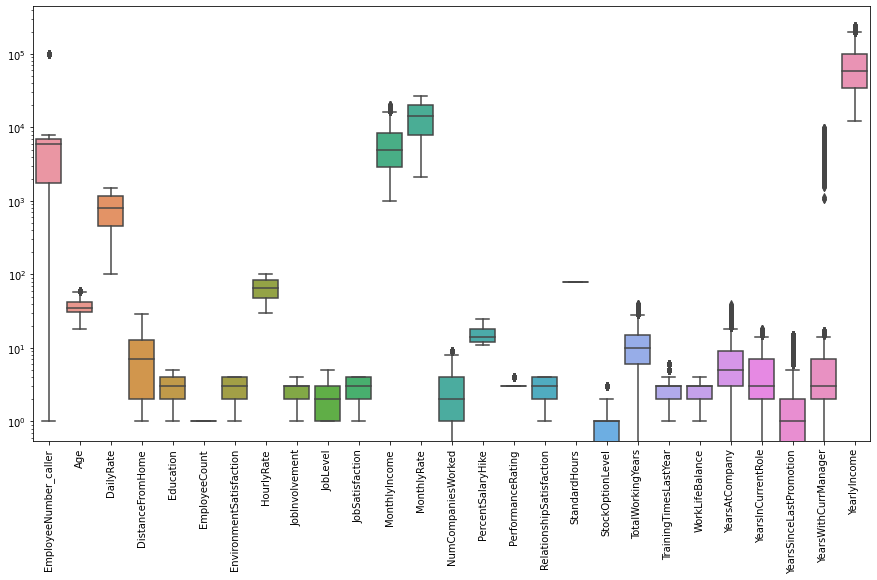

In [83]:
plt.figure(figsize=(15, 8))

sns.boxplot(data=df)

plt.yscale('log')
plt.xticks(rotation=90)
plt.show()